# Question 1
Please download daily Closing Index for the CSI 300 index from China Stock Market Series/Stock Trading/Market Index table over 2004/1/1 to 2023/12/31, and finish the following tasks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import skew, kurtosis
from scipy.stats import shapiro

fpath = "data/Market Index/TRD_Index.csv"
index_df = pd.read_csv(fpath)

(a) Manually derive monthly CSI 300 index returns and provide summary statistics on mean, standard deviation, skewness and kurtosis for monthly CSI 300 index returns.

In [2]:
index_df.columns = ['code', 'date', 'close']
index_df['date'] = pd.to_datetime(index_df['date']).dt.to_period(freq='M')
index_df = index_df.drop_duplicates(subset=['date', 'code'], keep='last').reset_index(drop=True)

index_df['code'] = index_df['code'].astype(str)
index_df = index_df.loc[index_df['code'] == '300', :] # take out CSI300
index_df

,code,date,close
1152,300,2005-04,932.395
1153,300,2005-05,855.946
1154,300,2005-06,878.686
1155,300,2005-07,888.164
1156,300,2005-08,927.916
...,...,...,...
1372,300,2023-08,3765.268
1373,300,2023-09,3689.517
1374,300,2023-10,3572.506
1375,300,2023-11,3496.203


In [3]:
index_df['return'] = index_df['close'].pct_change()
index_df = index_df.loc[index_df['date'] != '2005-04', :]
index_df

,code,date,close,return
1153,300,2005-05,855.946,-0.081992
1154,300,2005-06,878.686,0.026567
1155,300,2005-07,888.164,0.010787
1156,300,2005-08,927.916,0.044757
1157,300,2005-09,917.390,-0.011344
...,...,...,...,...
1372,300,2023-08,3765.268,-0.062113
1373,300,2023-09,3689.517,-0.020118
1374,300,2023-10,3572.506,-0.031714
1375,300,2023-11,3496.203,-0.021358


In [4]:
mean = index_df['return'].mean()
std = index_df['return'].std()
skewness = skew(index_df['return'])
kurt = kurtosis(index_df['return'])


stats = pd.DataFrame({'Mean': [mean], 'Standard deviation': [std], 'Skewness': [skewness], 'Kurtosis': [kurt]})
stats = stats.round(10)
print(stats)
stats.to_csv('output/index_stats.csv', index=False)

       Mean  Standard deviation  Skewness  Kurtosis
0  0.009086            0.080712  0.015217  1.449857


(b) Plot a histogram for CSI 300 monthly returns.

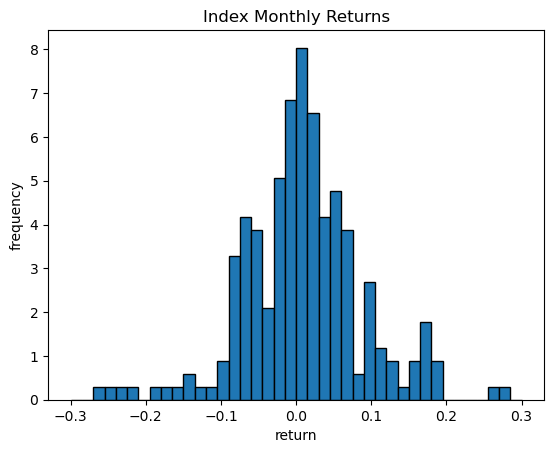

In [5]:
# Plot a histogram for monthly returns, y-axis is density
plt.hist(index_df['return'], bins=40, range=(-0.3, 0.3), density=True, edgecolor='black')
plt.title('Index Monthly Returns')
plt.xlabel('return')
plt.ylabel('frequency')

# save the histogram as pic
plt.savefig('output/q1_graph.png', dpi=300)
plt.show()

In [6]:
# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(index_df['return'])

# Print the test results
print(f"Shapiro-Wilk test statistic: {statistic}")
print(f"p-value: {p_value}")

# form the dataframe of statistic
test_stats = pd.DataFrame({'Shapiro-Wilk test statistic': [statistic], 'p-value': [p_value]})
test_stats = test_stats.round(6)
test_stats.to_csv('output/test_stats.csv', index=False)

Shapiro-Wilk test statistic: 0.971137285232544
p-value: 0.00015468655328731984


# Question 2
Since Jensen, Black, and Scholes (1972, hereafter BJS) , there have been many attempts to empirically test the relation between asset risks and expected returns. Chen et al. (2019) conduct a simplified version of BJS’s test on the Chinese market. Please carefully read through Chen et al. (2019) and finish the following tasks.

(a) Download weekly Returns Without Cash Dividend Reinvested for all A-share mainboard stocks from China Stock Market Series/Stock Trading/Individual Stock Trading table from the first week of 2017 to the last week of 2022.

In [7]:
fpath = "data/Weekly Stock Price Return/TRD_Week.csv"
return_df1 = pd.read_csv(fpath)
fpath = 'data/Weekly Stock Price Return/TRD_Week1.csv'
return_df2 = pd.read_csv(fpath)

# combine the two dataframes
R_stock = pd.concat([return_df1, return_df2], axis=0)
R_stock.columns = ['code', 'week', 'return_i', 'type']
R_stock = R_stock.loc[(R_stock['type'] == 1) | (R_stock['type'] == 4) | (R_stock['type'] == 64), :]
R_stock.drop(columns=['type'], inplace=True)
R_stock

,code,week,return_i
0,1,2017-01,0.003297
1,1,2017-02,0.003286
2,1,2017-03,0.006550
3,1,2017-04,0.011931
4,1,2017-05,-0.007503
...,...,...,...
192896,873527,2022-49,-0.005513
192897,873527,2022-50,-0.024390
192898,873527,2022-51,-0.019318
192899,873527,2022-52,-0.067207


(b) Calculate weekly market returns as the mean value of weekly returns of all mainboard stocks.

In [8]:
Rm = R_stock.groupby('week')['return_i'].mean()
Rm = Rm.to_frame().reset_index()
Rm.columns = ['week', 'return_m']
Rm

,week,return_m
0,2017-01,0.018377
1,2017-02,-0.032801
2,2017-03,-0.015996
3,2017-04,0.018515
4,2017-05,-0.002261
...,...,...
303,2022-49,0.028340
304,2022-50,0.003581
305,2022-51,-0.014400
306,2022-52,-0.048004


(c) Load weekly risk-free return data from “weekly_risk_free_rate.xlsx” or “weekly_risk_free_rate.dta

In [9]:
fpath = "data/weekly_risk_free_rate.xlsx"
Rf = pd.read_excel(fpath)
Rf.columns = ['week', 'return_f']
Rf['week'] = Rf['week'].dt.strftime('%Y-%W').astype('str')
Rf[['year', 'week_num']] = Rf['week'].str.split('-', expand=True)
Rf['week_num'] = (Rf['week_num'].astype('int') + 1).astype('str').str.zfill(2)
Rf['week'] = Rf['year'] + '-' + Rf['week_num']
Rf = Rf.drop(columns=['year', 'week_num'])
Rf

,week,return_f
0,2017-01,0.000571
1,2017-02,0.000738
2,2017-03,0.000543
3,2017-04,0.000774
4,2017-05,0.000802
...,...,...
307,2022-48,0.000444
308,2022-49,0.000471
309,2022-50,0.000477
310,2022-51,0.000459


(d) Follow section 4 in Chen et al. (2019) to replicate Table 2 and 3 with data obtained from (a) - (c).

In other words, you reproduce two tables with the original methology yet with different data.

#### 计算个股beta系数
首先根据第一期(前 33 周)数据计算出 r i,t 和 r m,t ，并回归得出所有样本个股(共 50 支)的 β 系数即 βi。单因素模型。

In [10]:
R_stock = pd.merge(R_stock, Rm, on='week', how='left')
R_stock.dropna(inplace=True)
R_stock['week'] = R_stock['week'].astype('str')
R_stock

,code,week,return_i,return_m
0,1,2017-01,0.003297,0.018377
1,1,2017-02,0.003286,-0.032801
2,1,2017-03,0.006550,-0.015996
3,1,2017-04,0.011931,0.018515
4,1,2017-05,-0.007503,-0.002261
...,...,...,...,...
889066,873527,2022-49,-0.005513,0.028340
889067,873527,2022-50,-0.024390,0.003581
889068,873527,2022-51,-0.019318,-0.014400
889069,873527,2022-52,-0.067207,-0.048004


In [11]:
"""Regression part"""
reg_results = pd.DataFrame()
reg_R_stock = R_stock.loc[(R_stock['week'].str.startswith('2017')) | (R_stock['week'].str.startswith('2018')), :]

for code in reg_R_stock['code'].unique():
    code_data = reg_R_stock[reg_R_stock['code'] == code]
    
    X = code_data['return_m']
    X = sm.add_constant(X)
    y = code_data['return_i']
    
    model = sm.OLS(y, X)
    single_reg_result = model.fit()
    
    try:
        alpha = single_reg_result.params['const']
        beta = single_reg_result.params['return_m']
        r_squared = single_reg_result.rsquared

        reg_results = pd.concat([reg_results, pd.DataFrame({'code': [code], 'alpha': [alpha], 'beta': [beta], 'r_squared': [r_squared]})], ignore_index=True)
    except KeyError:
        pass

#### 构造股票组合

由于单支股票存在较大的非系统性风险，易对收益与风险的关系产生偏差。为分散部分非系统性风险，先将第一期个股回归出的 β i 依照大小关系进行分组(共 10 组)，依照简单算术平均法算出组合超额收益 rp,t−rf,t，根据以下公式(7)对组合再次做时间序列回归，得到组合 βp。

In [12]:
# 先将第一期个股回归出的 β i 依照大小关系进行分组(共 10 组)
reg_results = reg_results[reg_results['r_squared'] != 1] # This step is to remove the stocks that were just issued

reg_results = reg_results.sort_values(by='beta')
reg_results['group'] = pd.qcut(reg_results['beta'], 10, labels=False)
reg_results['group'] = (reg_results['group'] + 1).astype('int')

R_stock = pd.merge(R_stock, reg_results[['code', 'group']], on='code', how='left')
reg_results

,code,alpha,beta,r_squared,group
2276,601319,-0.108842,-9.406961,0.582978,1
2502,603220,-0.031701,-9.061077,0.709248,1
1381,2937,0.026652,-1.876577,0.208594,1
247,693,-0.201346,-0.553216,0.217343,1
1456,600086,-0.010997,-0.339693,0.016150,1
...,...,...,...,...,...
2246,601162,0.088892,3.663698,0.296158,10
2489,603187,0.042628,5.745619,0.890557,10
1387,2943,0.254810,16.343042,0.995283,10
1385,2941,0.347723,16.788947,0.982086,10


In [13]:
portfolio = R_stock.groupby(['week', 'group'])['return_i'].mean()
portfolio = portfolio.to_frame().reset_index()
portfolio.columns = ['week', 'group', 'return_p']

portfolio = pd.merge(portfolio, Rf, on='week', how='left')
portfolio = pd.merge(portfolio, Rm, on='week', how='left')
portfolio.dropna(inplace=True)
portfolio['excess_return'] = portfolio['return_p'] - portfolio['return_f']
portfolio['risk_premium'] = portfolio['return_m'] - portfolio['return_f']
portfolio

,week,group,return_p,return_f,return_m,excess_return,risk_premium
0,2017-01,1.0,0.013657,0.000571,0.018377,0.013086,0.017806
1,2017-01,2.0,0.011808,0.000571,0.018377,0.011237,0.017806
2,2017-01,3.0,0.015618,0.000571,0.018377,0.015046,0.017806
3,2017-01,4.0,0.020422,0.000571,0.018377,0.019851,0.017806
4,2017-01,5.0,0.019601,0.000571,0.018377,0.019030,0.017806
...,...,...,...,...,...,...,...
3065,2022-52,6.0,-0.046288,0.000432,-0.048004,-0.046720,-0.048436
3066,2022-52,7.0,-0.052857,0.000432,-0.048004,-0.053290,-0.048436
3067,2022-52,8.0,-0.047585,0.000432,-0.048004,-0.048017,-0.048436
3068,2022-52,9.0,-0.051654,0.000432,-0.048004,-0.052087,-0.048436


In [14]:
"""Regression part"""
reg_results_2 = pd.DataFrame()
reg_portfolio = portfolio.loc[(portfolio['week'].str.startswith('2019')) | (portfolio['week'].str.startswith('2020')), :]

for group in reg_portfolio['group'].unique():
    group_data = reg_portfolio[reg_portfolio['group'] == group]
    
    X = group_data['risk_premium']
    X = sm.add_constant(X)
    y = group_data['excess_return']
    
    model = sm.OLS(y, X)
    single_reg_result = model.fit()
    
    alpha = single_reg_result.params['const']
    beta = single_reg_result.params['risk_premium']
    alpha_t = single_reg_result.tvalues.iloc[0]
    beta_t = single_reg_result.tvalues.iloc[1]
    alpha_p = single_reg_result.pvalues.iloc[0]
    beta_p = single_reg_result.pvalues.iloc[1]
    r_squared = single_reg_result.rsquared
    

    reg_results_2 = pd.concat([reg_results_2, pd.DataFrame({'group': [group], 
                                                        'alpha': [alpha], 'alpha_t': [alpha_t], 'alpha_p': [alpha_p], 
                                                        'beta': [beta], 'beta_t': [beta_t], 'beta_p': [beta_p], 
                                                        'r_squared': [r_squared]})], ignore_index=True)



# output_reg_result = reg_results_2
# # all data in output_reg_result is rounded to 6 decimal places
# output_reg_result = output_reg_result.round(5)
# output_reg_result.columns = ['Group', 'alpha_p', 'alpha t-value', 'alpha p-value', 'beta_p', 'beta t-value', 'beta p-value', 'R^2']
# output_reg_result.to_csv('output/Table_2_result.csv', index=False)
reg_results_2

,group,alpha,alpha_t,alpha_p,beta,beta_t,beta_p,r_squared
0,1.0,-0.001276,-1.983164,0.050092,0.799336,39.082584,2.182656e-62,0.938554
1,2.0,-0.000049,-0.092868,0.926195,0.881322,52.527078,1.250288e-74,0.965024
2,3.0,0.000212,0.492032,0.623775,0.896143,65.383910,7.187805e-84,0.977143
3,4.0,0.000431,0.997205,0.321072,0.947535,69.048392,3.460747e-86,0.979456
4,5.0,-0.000011,-0.033369,0.973447,1.000911,98.407127,2.383977e-101,0.989779
5,6.0,-0.000066,-0.169873,0.865453,1.043985,84.578947,7.518552e-95,0.986214
6,7.0,-0.000205,-0.575671,0.566131,1.040153,92.020924,1.818693e-98,0.988328
7,8.0,-0.000129,-0.273143,0.785307,1.104915,73.845758,4.759620e-89,0.981992
8,9.0,0.000304,0.674254,0.501705,1.087067,75.825311,3.537284e-90,0.982904
9,10.0,-0.000953,-1.665712,0.098901,1.150543,63.233120,1.884730e-82,0.975600


#### CAPM的横截面回归

根据第三期(最后 33 周)的数据，来计算第二期分组构成的 10 个组合在观测期内的周超额收益率的平 均值

In [15]:
reg2_portfolio = portfolio.loc[(portfolio['week'].str.startswith('2021')) | (portfolio['week'].str.startswith('2022')), :]
reg2_portfolio = reg2_portfolio.groupby('group')['excess_return'].mean()
reg2_portfolio = pd.merge(reg2_portfolio, reg_results_2[['group', 'beta']], on='group', how='left')
reg2_portfolio

,group,excess_return,beta
0,1.0,0.001080,0.799336
1,2.0,0.001477,0.881322
2,3.0,0.001146,0.896143
3,4.0,0.001100,0.947535
4,5.0,0.001976,1.000911
5,6.0,0.001294,1.043985
6,7.0,0.002071,1.040153
7,8.0,0.001400,1.104915
8,9.0,0.001960,1.087067
9,10.0,0.002210,1.150543


In [22]:
"""Regression part"""
reg_results_3 = pd.DataFrame()

X = reg2_portfolio['beta']
X = sm.add_constant(X)
y = reg2_portfolio['excess_return']

model = sm.OLS(y, X)
reg_results_3 = model.fit()

print(reg_results_3.summary())

# store intercept, beta, intercept t-value, beta t-value, R^2, F-statistic, P(F-statistic) in a dataframe
output_reg_result = pd.DataFrame({'gamma_0': [reg_results_3.params['const']], 'gamma_1': [reg_results_3.params['beta']], 
                                  'gamma_{0}  t-value': [reg_results_3.tvalues[0]], 'gamma_{1}  t-value': [reg_results_3.tvalues[1]], 
                                  'R^2': [reg_results_3.rsquared], 'F-statistic': [reg_results_3.fvalue], 'P': [reg_results_3.f_pvalue]})
output_reg_result = output_reg_result.round(5)
output_reg_result.to_csv('output/Table_3_result.csv', index=False)

                            OLS Regression Results                            
Dep. Variable:          excess_return   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     6.783
Date:                Fri, 19 Apr 2024   Prob (F-statistic):             0.0314
Time:                        23:38:18   Log-Likelihood:                 66.726
No. Observations:                  10   AIC:                            -129.5
Df Residuals:                       8   BIC:                            -128.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.001     -1.051      0.3

/Users/liujunle/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


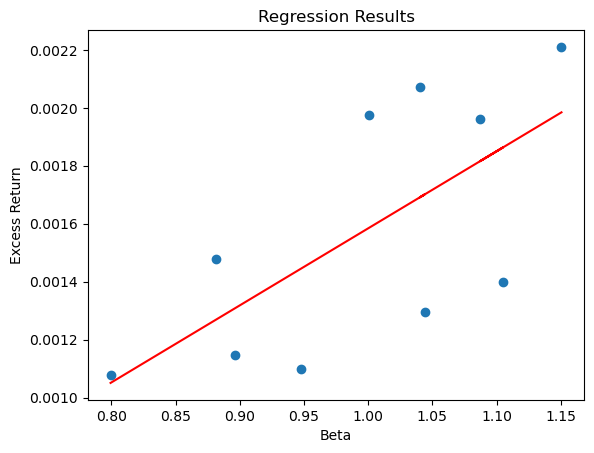

In [17]:
# plot the regression results
plt.scatter(reg2_portfolio['beta'], reg2_portfolio['excess_return'])
plt.plot(reg2_portfolio['beta'], reg_results_3.params['const'] + reg_results_3.params['beta'] * reg2_portfolio['beta'], color='red')
plt.title('Regression Results')
plt.xlabel('Beta')
plt.ylabel('Excess Return')
plt.show()